# Satellite Imagery-Based Property Valuation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df=pd.read_csv("C:\\Users\\vansh\\Desktop\\satellite imagery\\train(1)(train(1)).csv")

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [9]:
df.shape

(16209, 21)

In [11]:
df.describe

<bound method NDFrame.describe of                id             date   price  bedrooms  bathrooms  sqft_living  \
0      9117000170  20150505T000000  268643         4       2.25         1810   
1      6700390210  20140708T000000  245000         3       2.50         1600   
2      7212660540  20150115T000000  200000         4       2.50         1720   
3      8562780200  20150427T000000  352499         2       2.25         1240   
4      7760400350  20141205T000000  232000         3       2.00         1280   
...           ...              ...     ...       ...        ...          ...   
16204  5272200045  20141113T000000  378000         3       1.50         1000   
16205  9578500790  20141111T000000  399950         3       2.50         3087   
16206  7202350480  20140930T000000  575000         3       2.50         2120   
16207  1723049033  20140620T000000  245000         1       0.75          380   
16208  6147650280  20150325T000000  315000         4       2.50         3130   

     

In [22]:
df.isnull().sum().sort_values(ascending=False)


id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

In [41]:
##Price increases with living area, showing a strong positive correlation

In [75]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [81]:
df.corr

<bound method DataFrame.corr of                id             date   price  bedrooms  bathrooms  sqft_living  \
0      9117000170  20150505T000000  268643         4       2.25         1810   
1      6700390210  20140708T000000  245000         3       2.50         1600   
2      7212660540  20150115T000000  200000         4       2.50         1720   
3      8562780200  20150427T000000  352499         2       2.25         1240   
4      7760400350  20141205T000000  232000         3       2.00         1280   
...           ...              ...     ...       ...        ...          ...   
16204  5272200045  20141113T000000  378000         3       1.50         1000   
16205  9578500790  20141111T000000  399950         3       2.50         3087   
16206  7202350480  20140930T000000  575000         3       2.50         2120   
16207  1723049033  20140620T000000  245000         1       0.75          380   
16208  6147650280  20150325T000000  315000         4       2.50         3130   

       

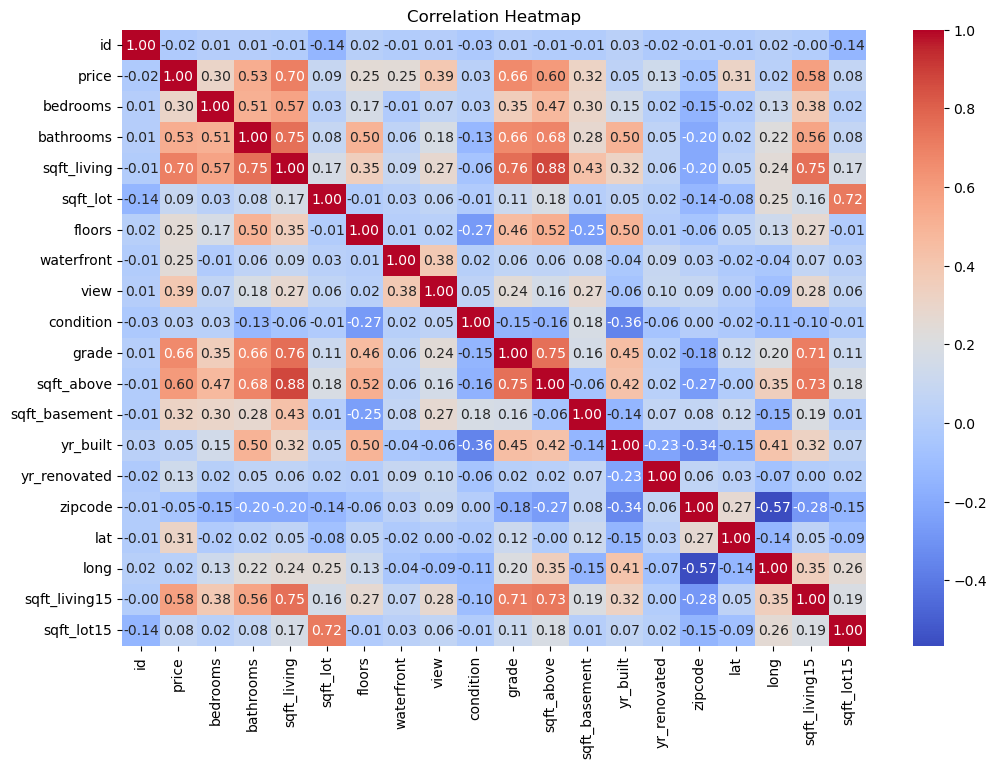

In [90]:
corr = df.corr(numeric_only=True)

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [113]:
drop_cols = ["id", "sqft_lot", "yr_built", "sqft_lot15"]
df = df.drop(columns=drop_cols)


KeyError: "['id', 'sqft_lot', 'sqft_lot15'] not found in axis"

In [115]:
df

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,20150505T000000,268643,4,2.25,1810,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660
1,20140708T000000,245000,3,2.50,1600,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720
2,20150115T000000,200000,4,2.50,1720,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870
3,20150427T000000,352499,2,2.25,1240,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240
4,20141205T000000,232000,3,2.00,1280,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,20141113T000000,378000,3,1.50,1000,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000
16205,20141111T000000,399950,3,2.50,3087,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927
16206,20140930T000000,575000,3,2.50,2120,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690
16207,20140620T000000,245000,1,0.75,380,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170


In [117]:
drop_cols = ["yr_renovated","yr_built","zipcode","date"]
df = df.drop(columns=drop_cols)

In [119]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15
0,268643,4,2.25,1810,2.0,0,0,3,7,1810,0,47.4362,-122.187,1660
1,245000,3,2.50,1600,2.0,0,0,4,7,1600,0,47.4034,-122.187,1720
2,200000,4,2.50,1720,2.0,0,0,3,8,1720,0,47.2704,-122.313,1870
3,352499,2,2.25,1240,2.0,0,0,3,7,1150,90,47.5321,-122.073,1240
4,232000,3,2.00,1280,1.0,0,0,3,7,1280,0,47.3715,-122.074,1590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,378000,3,1.50,1000,1.0,0,0,3,7,1000,0,47.7144,-122.319,1000
16205,399950,3,2.50,3087,2.0,0,0,3,8,3087,0,47.2974,-122.349,2927
16206,575000,3,2.50,2120,2.0,0,0,3,7,2120,0,47.6810,-122.032,1690
16207,245000,1,0.75,380,1.0,0,0,3,5,380,0,47.4810,-122.323,1170


In [121]:
df.shape

(16209, 14)

In [123]:
df.isnull().sum

<bound method DataFrame.sum of        price  bedrooms  bathrooms  sqft_living  floors  waterfront   view  \
0      False     False      False        False   False       False  False   
1      False     False      False        False   False       False  False   
2      False     False      False        False   False       False  False   
3      False     False      False        False   False       False  False   
4      False     False      False        False   False       False  False   
...      ...       ...        ...          ...     ...         ...    ...   
16204  False     False      False        False   False       False  False   
16205  False     False      False        False   False       False  False   
16206  False     False      False        False   False       False  False   
16207  False     False      False        False   False       False  False   
16208  False     False      False        False   False       False  False   

       condition  grade  sqft_above  sqft_ba

In [129]:
df['sqft_living'].unique()

array([ 1810,  1600,  1720,  1240,  1280,  2600,  1060,  2130,  1070,
         998,  2510,  3970,  4080,  1860,  1400,  3290,  1954,  1800,
        2030,  1330,  1470,  2100,  1760,  1050,  2270,  2080,  1780,
        3540,  2750,  1150,  1820,  2890,  2140,  1660,  1910,  1650,
        1950,  1790,  1170,  3720,  1130,  2190,  4320,  1640,  1680,
        1540,  2360,  1380,  1670,  3160,  1300,   840,  1970,   810,
        2810,  2300,  1480,  2350,  2340,  1620,  2150,  2580,  1420,
        4390,  2070,  1940,  1520,  4160,  2220,  2650,  1310,   800,
        2320,   520,  2590,  2530,  2050,  1740,  1710,  2010,  1610,
        3350,  1630,  1340,  2920,  1200,  1190,  2160,  2850,  2480,
        1900,  2440,  1210,  2200,  1570,  1460,  1870,  1840,  4750,
        1510,  1410,  3150,  1360,  2610,  2260,  2240,  2253,  1430,
        2460,  3440,  2450,  1440,  1730,  3870,  1830,  3300,  3010,
        2490,  1560,  2110,  2120,  3170,  3110,  2390,  1450,   960,
         830,  1550,

In [131]:
df.loc[40]

price            581000.0000
bedrooms              2.0000
bathrooms             1.0000
sqft_living        1170.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             4.0000
grade                 7.0000
sqft_above         1170.0000
sqft_basement         0.0000
lat                  47.6784
long               -122.3860
sqft_living15      1560.0000
Name: 40, dtype: float64

In [133]:
df1=df.copy()

In [135]:
df1['price_per_square_feet']=df1['price']/df1['sqft_living']

In [137]:
df1

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,price_per_square_feet
0,268643,4,2.25,1810,2.0,0,0,3,7,1810,0,47.4362,-122.187,1660,148.421547
1,245000,3,2.50,1600,2.0,0,0,4,7,1600,0,47.4034,-122.187,1720,153.125000
2,200000,4,2.50,1720,2.0,0,0,3,8,1720,0,47.2704,-122.313,1870,116.279070
3,352499,2,2.25,1240,2.0,0,0,3,7,1150,90,47.5321,-122.073,1240,284.273387
4,232000,3,2.00,1280,1.0,0,0,3,7,1280,0,47.3715,-122.074,1590,181.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,378000,3,1.50,1000,1.0,0,0,3,7,1000,0,47.7144,-122.319,1000,378.000000
16205,399950,3,2.50,3087,2.0,0,0,3,8,3087,0,47.2974,-122.349,2927,129.559443
16206,575000,3,2.50,2120,2.0,0,0,3,7,2120,0,47.6810,-122.032,1690,271.226415
16207,245000,1,0.75,380,1.0,0,0,3,5,380,0,47.4810,-122.323,1170,644.736842


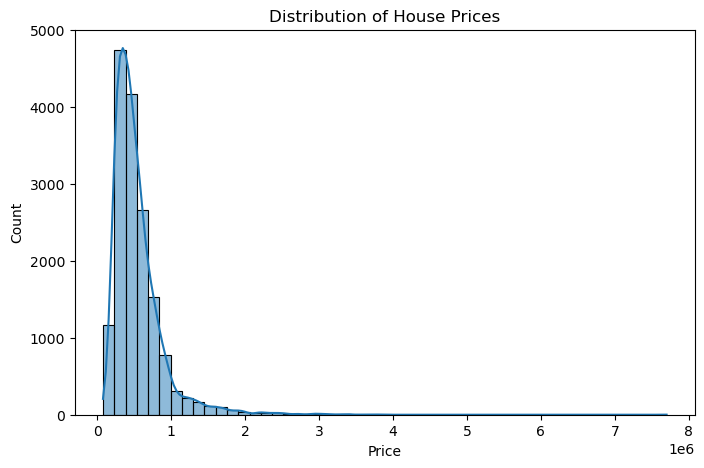

In [209]:
plt.figure(figsize=(8,5))
sns.histplot(df1["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Right-skewed distribution

Most houses are concentrated at lower to mid prices

A small number of very expensive houses stretch the tail to the right

This is called a positively skewed distribution.



Peak around ~300k–600k

Long tail going up to ~7–8 million

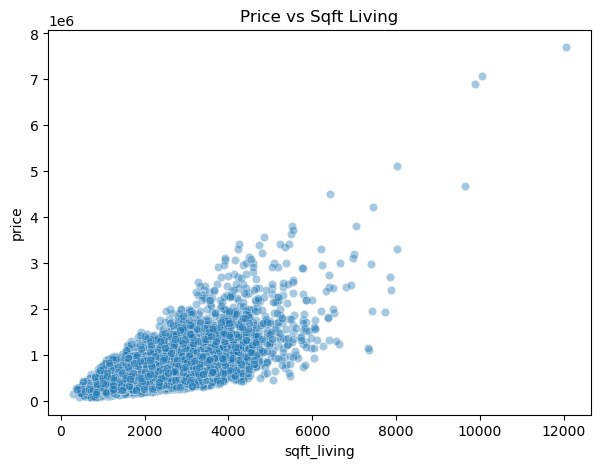

In [211]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df1["sqft_living"], 
    y=df1["price"],
    alpha=0.4
)
plt.title("Price vs Sqft Living")
plt.show()



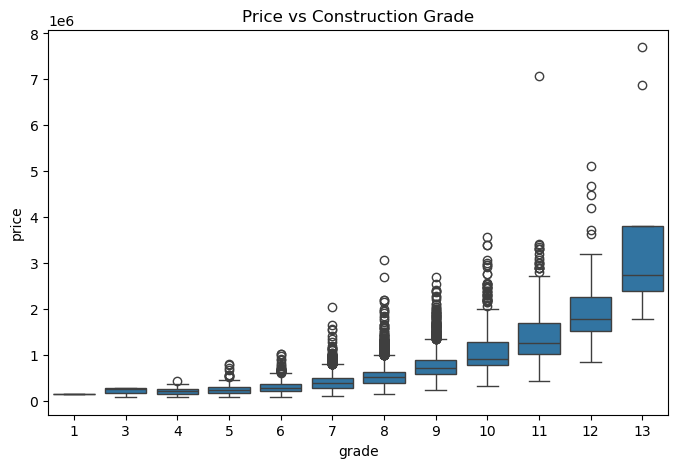

In [213]:
plt.figure(figsize=(8,5))
sns.boxplot(x="grade", y="price", data=df1)
plt.title("Price vs Construction Grade")
plt.show()


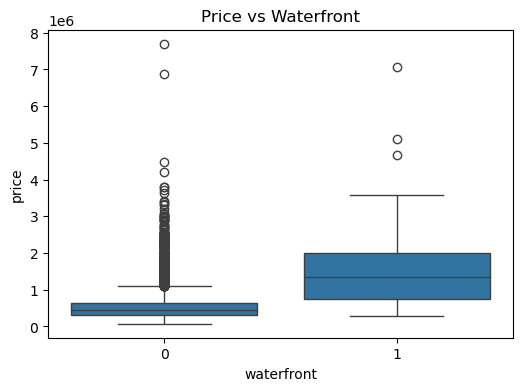

In [215]:
plt.figure(figsize=(6,4))
sns.boxplot(x="waterfront", y="price", data=df1)
plt.title("Price vs Waterfront")
plt.show()

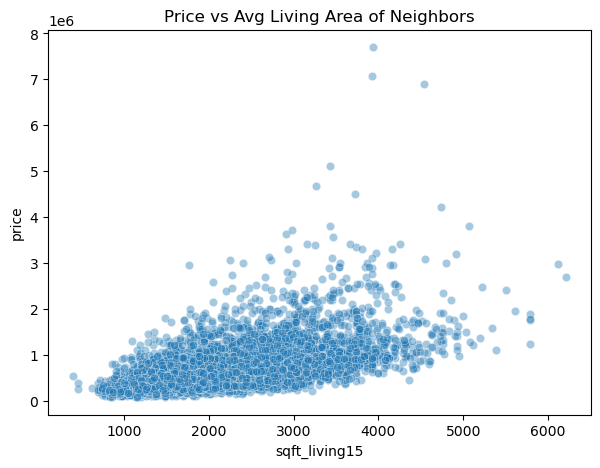

In [217]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df1["sqft_living15"], 
    y=df1["price"],
    alpha=0.4
)
plt.title("Price vs Avg Living Area of Neighbors")
plt.show()


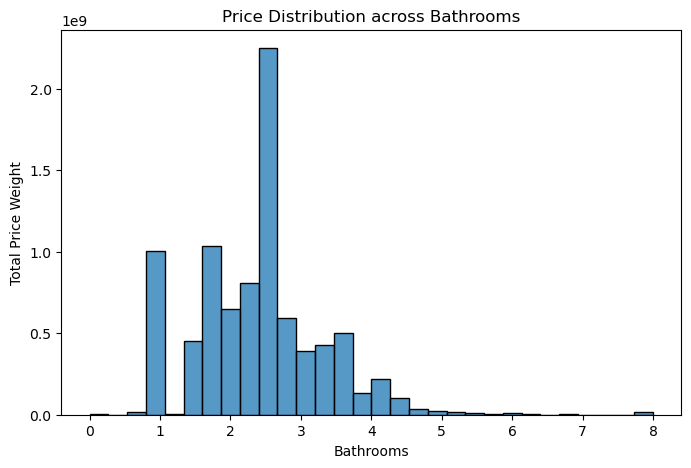

In [219]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df1,
    x="bathrooms",
    weights="price",
    bins=30
)
plt.title("Price Distribution across Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Total Price Weight")
plt.show()

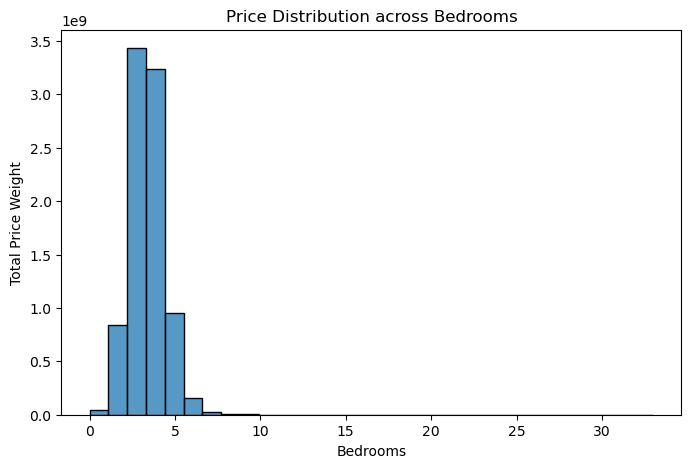

In [221]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df1,
    x="bedrooms",
    weights="price",
    bins=30
)
plt.title("Price Distribution across Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Total Price Weight")
plt.show()


In [223]:
bedroom_counts = df1["bedrooms"].value_counts().sort_index()
bedroom_counts

bedrooms
0        8
1      142
2     2098
3     7380
4     5128
5     1213
6      197
7       26
8        9
9        5
10       2
33       1
Name: count, dtype: int64

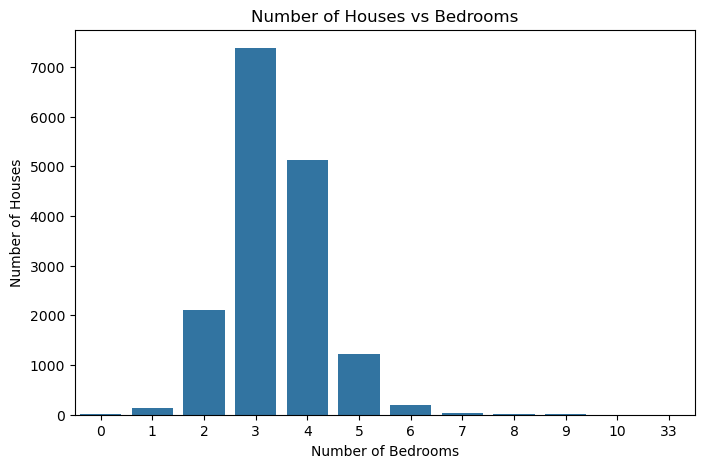

In [165]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=bedroom_counts.index,
    y=bedroom_counts.values
)
plt.title("Number of Houses vs Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Houses")
plt.show()


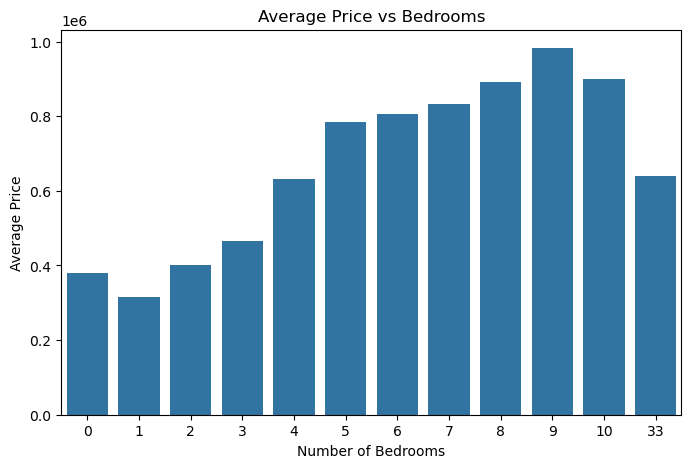

In [225]:
avg_price = df1.groupby("bedrooms")["price"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=avg_price.index,
    y=avg_price.values
)
plt.title("Average Price vs Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.show()


In [227]:
avg_price_sqft = df1.groupby("sqft_living")["price"].mean().reset_index()


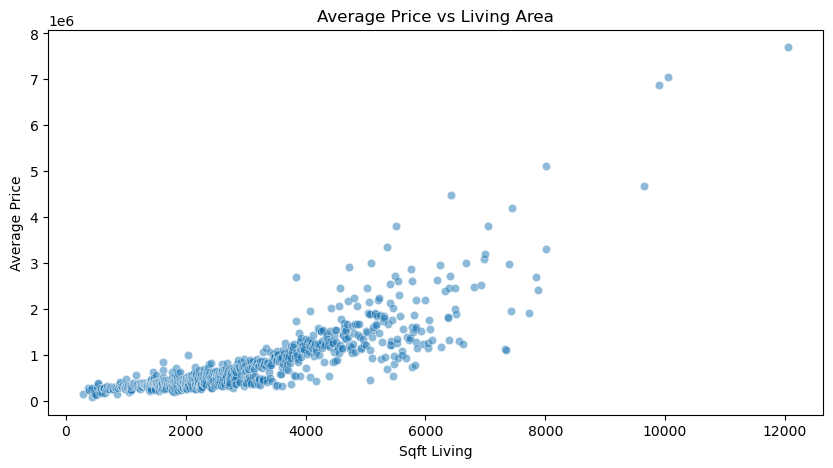

In [229]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=avg_price_sqft,
    x="sqft_living",
    y="price",
    alpha=0.5
)
plt.title("Average Price vs Living Area")
plt.xlabel("Sqft Living")
plt.ylabel("Average Price")
plt.show()


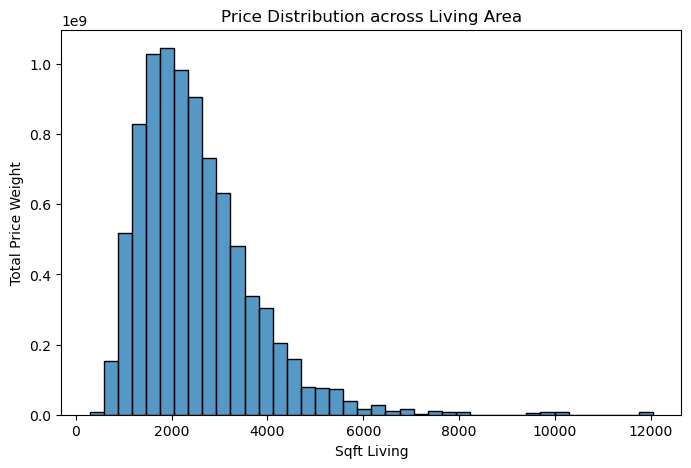

In [231]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df1,
    x="sqft_living",
    weights="price",
    bins=40
)
plt.title("Price Distribution across Living Area")
plt.xlabel("Sqft Living")
plt.ylabel("Total Price Weight")
plt.show()


In [233]:
grade_counts = df1["grade"].value_counts().sort_index()
print(grade_counts)


grade
1        1
3        3
4       24
5      183
6     1511
7     6761
8     4563
9     1943
10     861
11     286
12      63
13      10
Name: count, dtype: int64


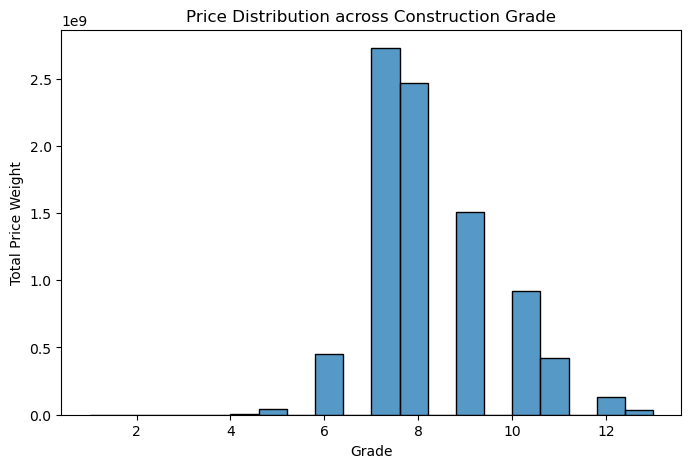

In [235]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df1,
    x="grade",
    weights="price",
    bins=20
)

plt.title("Price Distribution across Construction Grade")
plt.xlabel("Grade")
plt.ylabel("Total Price Weight")
plt.show()


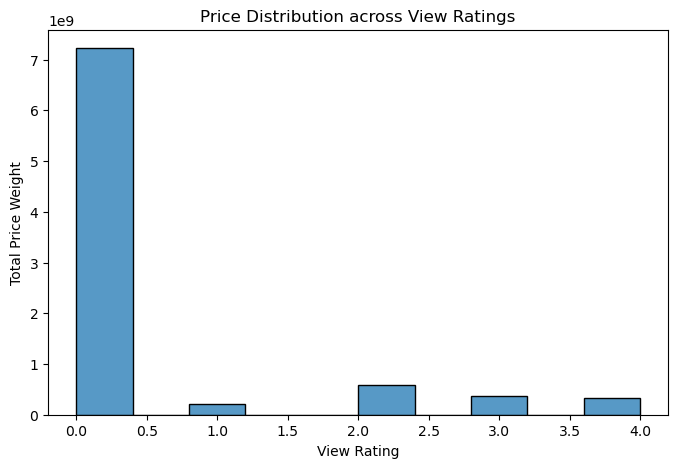

In [237]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df1,
    x="view",
    weights="price",
    bins=10
)
plt.title("Price Distribution across View Ratings")
plt.xlabel("View Rating")
plt.ylabel("Total Price Weight")
plt.show()

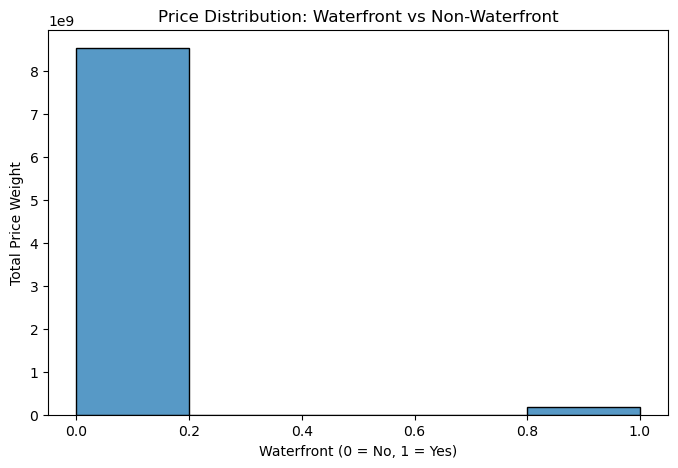

In [239]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df1,
    x="waterfront",
    weights="price",
    bins=5
)
plt.title("Price Distribution: Waterfront vs Non-Waterfront")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Total Price Weight")
plt.show()

# Outlier removal

In [207]:
df1

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,price_per_square_feet
0,268643,4,2.25,1810,2.0,0,0,3,7,1810,0,47.4362,-122.187,1660,148.421547
1,245000,3,2.50,1600,2.0,0,0,4,7,1600,0,47.4034,-122.187,1720,153.125000
2,200000,4,2.50,1720,2.0,0,0,3,8,1720,0,47.2704,-122.313,1870,116.279070
3,352499,2,2.25,1240,2.0,0,0,3,7,1150,90,47.5321,-122.073,1240,284.273387
4,232000,3,2.00,1280,1.0,0,0,3,7,1280,0,47.3715,-122.074,1590,181.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,378000,3,1.50,1000,1.0,0,0,3,7,1000,0,47.7144,-122.319,1000,378.000000
16205,399950,3,2.50,3087,2.0,0,0,3,8,3087,0,47.2974,-122.349,2927,129.559443
16206,575000,3,2.50,2120,2.0,0,0,3,7,2120,0,47.6810,-122.032,1690,271.226415
16207,245000,1,0.75,380,1.0,0,0,3,5,380,0,47.4810,-122.323,1170,644.736842


In [273]:
df1[df1.sqft_living/df1.bedrooms<100]


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,price_per_square_feet
3193,640000,33,1.75,1620,1.0,0,0,5,7,1040,580,47.6878,-122.331,1330,395.061728


In [275]:
df2=df1[~(df1.sqft_living/df1.bedrooms<100)]

In [277]:
df2

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,price_per_square_feet
0,268643,4,2.25,1810,2.0,0,0,3,7,1810,0,47.4362,-122.187,1660,148.421547
1,245000,3,2.50,1600,2.0,0,0,4,7,1600,0,47.4034,-122.187,1720,153.125000
2,200000,4,2.50,1720,2.0,0,0,3,8,1720,0,47.2704,-122.313,1870,116.279070
3,352499,2,2.25,1240,2.0,0,0,3,7,1150,90,47.5321,-122.073,1240,284.273387
4,232000,3,2.00,1280,1.0,0,0,3,7,1280,0,47.3715,-122.074,1590,181.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,378000,3,1.50,1000,1.0,0,0,3,7,1000,0,47.7144,-122.319,1000,378.000000
16205,399950,3,2.50,3087,2.0,0,0,3,8,3087,0,47.2974,-122.349,2927,129.559443
16206,575000,3,2.50,2120,2.0,0,0,3,7,2120,0,47.6810,-122.032,1690,271.226415
16207,245000,1,0.75,380,1.0,0,0,3,5,380,0,47.4810,-122.323,1170,644.736842


In [279]:
df2["price_per_square_feet"].describe()


count    16208.000000
mean       264.052614
std        109.939930
min         87.647059
25%        182.287533
50%        244.778505
75%        318.070895
max        810.138889
Name: price_per_square_feet, dtype: float64

In [289]:
df2[df2.sqft_living>8000]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,price_per_square_feet
1499,7062500,5,4.50,10040,2.0,1,2,3,11,7680,2360,47.6500,-122.214,3930,703.436255
1779,3300000,5,6.25,8020,2.0,0,0,3,11,8020,0,47.5675,-122.189,4160,411.471322
2115,6885000,6,7.75,9890,2.0,0,4,3,13,8860,1030,47.6305,-122.240,4540,696.157735
4962,7700000,6,8.00,12050,2.5,0,3,4,13,8570,3480,47.6298,-122.323,3940,639.004149
9264,5110800,5,5.25,8010,2.0,1,4,3,12,5990,2020,47.6767,-122.211,3430,638.052434
10412,4668000,5,6.75,9640,1.0,1,4,3,12,4820,4820,47.5570,-122.210,3270,484.232365


In [301]:
df3=df2[~((df2.sqft_living)>8000)]

In [303]:
df3

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,price_per_square_feet
0,268643,4,2.25,1810,2.0,0,0,3,7,1810,0,47.4362,-122.187,1660,148.421547
1,245000,3,2.50,1600,2.0,0,0,4,7,1600,0,47.4034,-122.187,1720,153.125000
2,200000,4,2.50,1720,2.0,0,0,3,8,1720,0,47.2704,-122.313,1870,116.279070
3,352499,2,2.25,1240,2.0,0,0,3,7,1150,90,47.5321,-122.073,1240,284.273387
4,232000,3,2.00,1280,1.0,0,0,3,7,1280,0,47.3715,-122.074,1590,181.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,378000,3,1.50,1000,1.0,0,0,3,7,1000,0,47.7144,-122.319,1000,378.000000
16205,399950,3,2.50,3087,2.0,0,0,3,8,3087,0,47.2974,-122.349,2927,129.559443
16206,575000,3,2.50,2120,2.0,0,0,3,7,2120,0,47.6810,-122.032,1690,271.226415
16207,245000,1,0.75,380,1.0,0,0,3,5,380,0,47.4810,-122.323,1170,644.736842


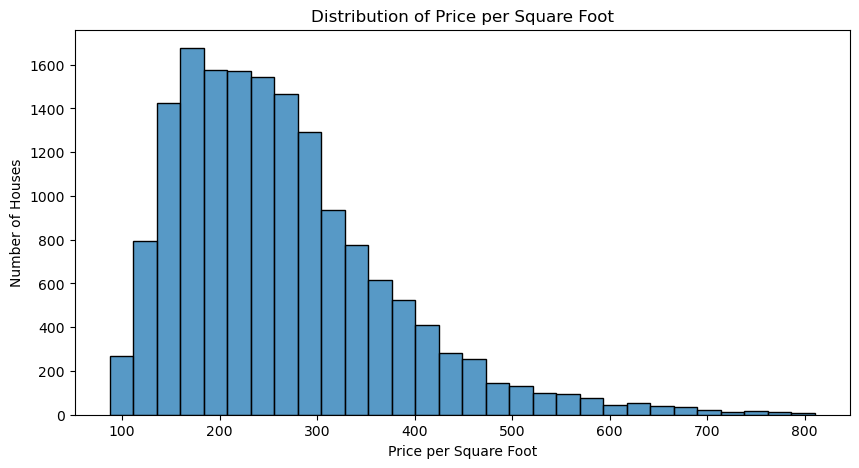

In [305]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df3["price_per_square_feet"],
    bins=30
)
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Number of Houses")
plt.show()


In [307]:
df3.to_csv("final_cleaned_data.csv", index=False)
